# Determinar los descriptores más relevantes
<hr>

In [1]:
import pandas as pd

In [2]:
des = pd.read_csv("df_con_descriptores_tratado.csv")

In [3]:
des.head()

,SMILES,BBB+/BBB-,mol,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_sulfide,fr_unbrch_alkane
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68BE...,12.341010,-3.794932,11.428571,398.400,2.285714,32.233272,2.676891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,13.190522,-2.144257,22.000000,520.480,2.555556,32.166556,3.253857,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,9.654043,0.195000,10.615385,305.502,3.000000,126.912704,2.146240,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,8.544584,0.532052,10.894737,342.266,3.157895,79.918731,2.405844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,11.445328,-1.798901,45.303030,461.467,2.696970,16.712087,3.141364,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Limpieza
<hr>

In [18]:
des.shape

(7807, 84)

In [36]:
des[des.isna().any(axis=1)]

,SMILES,BBB+/BBB-,mol,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_sulfide,fr_unbrch_alkane
357,[Li],BBB+,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,0.0,0.0,0.0,6.941,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,[Kr],BBB+,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,0.0,0.0,0.0,83.800,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,[Ar],BBB+,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,0.0,0.0,0.0,39.948,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,[Xe],BBB+,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,0.0,0.0,0.0,131.290,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
674,[Ne],BBB+,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,0.0,0.0,0.0,20.180,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
des["BCUT2D_MWHI"].fillna(des["BCUT2D_MWHI"].mean(), inplace=True)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_1708\1947534500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  des["BCUT2D_MWHI"].fillna(des["BCUT2D_MWHI"].mean(), inplace=True)


In [38]:
des[des.isna().any(axis=1)]

,SMILES,BBB+/BBB-,mol,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_sulfide,fr_unbrch_alkane


In [42]:
X = des.drop(columns=["SMILES", "BBB+/BBB-", "mol"]).copy()
y = des["BBB+/BBB-"].copy()

# Análisis de errores
<hr>

In [67]:
X.var().min()

0.14184354209256925

In [64]:
correlation_matrix = X.corr().abs()
threshold = 0.8

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

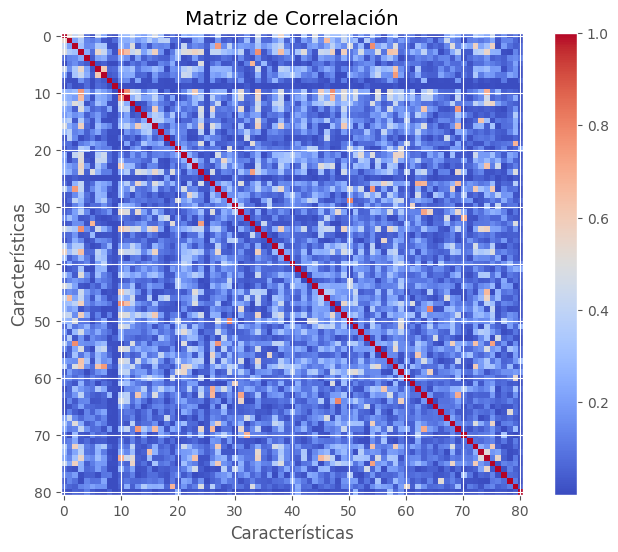

In [66]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor usando matplotlib
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Añadir barra de color
plt.colorbar(heatmap)

# Añadir etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Características')
plt.ylabel('Características')

# Mostrar el gráfico
plt.show()

# PCA
<hr>

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
from sklearn.decomposition import PCA

In [70]:
modelo = PCA(n_components=2)

In [71]:
modelo.fit(X_scaled)

PCA(n_components=2)

In [72]:
variables = modelo.transform(X_scaled)

In [73]:
variables

array([[ 0.04339597, -1.89498828],
       [ 4.59019171, -3.98775604],
       [-3.45238903, -1.18543119],
       ...,
       [-2.53040036, -0.00986938],
       [-3.44610378, -1.52170875],
       [-3.46564937, -1.75267045]])

In [74]:
import numpy as np
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = modelo.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Mostrar la varianza explicada y la varianza acumulada
print("Varianza explicada por cada componente principal:", explained_variance_ratio)
print("Varianza acumulada:", cumulative_variance)

Varianza explicada por cada componente principal: [0.14977766 0.10016754]
Varianza acumulada: [0.14977766 0.24994521]


In [75]:
import matplotlib.pyplot as plt

In [76]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [77]:
des["color"] = des["BBB+/BBB-"].apply(color)

In [78]:
variables.shape

(7807, 2)

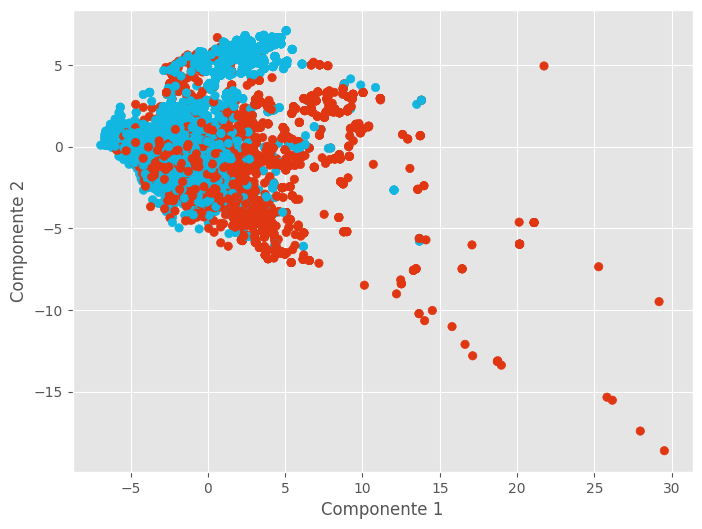

In [79]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(variables[:, 0], variables[:, 1], c = des["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

In [90]:
modelo = PCA(n_components=40)

In [91]:
modelo.fit(X_scaled)

PCA(n_components=40)

In [92]:
import numpy as np
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = modelo.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Mostrar la varianza explicada y la varianza acumulada
print("Varianza explicada por cada componente principal:", explained_variance_ratio)
print("Varianza acumulada:", cumulative_variance)

Varianza explicada por cada componente principal: [0.14977766 0.10016754 0.08154789 0.05816721 0.04672141 0.04130091
 0.03376463 0.03055851 0.02854462 0.02602742 0.02343547 0.02256706
 0.01961529 0.01790415 0.01730608 0.01585971 0.01423616 0.01358264
 0.0131413  0.01265267 0.01209763 0.01092603 0.01071304 0.01044081
 0.01042921 0.00997207 0.00939928 0.00918327 0.00867349 0.00845023
 0.00788348 0.00759636 0.00730919 0.00706985 0.00668571 0.0063324
 0.00577949 0.00570171 0.00514842 0.00479934]
Varianza acumulada: [0.14977766 0.24994521 0.3314931  0.38966031 0.43638173 0.47768264
 0.51144727 0.54200578 0.5705504  0.59657782 0.62001329 0.64258034
 0.66219563 0.68009978 0.69740586 0.71326557 0.72750174 0.74108438
 0.75422568 0.76687836 0.77897598 0.78990202 0.80061506 0.81105587
 0.82148508 0.83145716 0.84085643 0.8500397  0.85871319 0.86716342
 0.87504691 0.88264326 0.88995245 0.8970223  0.90370801 0.91004041
 0.91581989 0.9215216  0.92667003 0.93146936]


# Modelo Random Forest con PCA
<hr>

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Normalización
    ('pca', PCA()),                     # PCA
    ('classifier', RandomForestClassifier())  # Modelo de clasificación
])

In [94]:
param_grid = {
    'pca__n_components': [40],  # Número de componentes principales a considerar
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [97]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=8)

In [98]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=8,
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'pca__n_components': [40]},
             scoring='accuracy', verbose=2)

In [99]:
grid_search.best_score_

0.8726981585268214

In [100]:
grid_search.best_params_

{'classifier__max_depth': 30,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200,
 'pca__n_components': 40}

In [113]:
pipe = Pipeline([
    ('scaler', StandardScaler()),       # Normalización
    ('classifier', RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40))  # Modelo de clasificación
])

In [114]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=5,
                                        n_estimators=40))])

In [115]:
y_predicha = pipe.predict(X_test)

In [116]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.868
Recall 0.868
precision 0.867
f1 0.866


In [117]:
y_entrenamiento = pipe.predict(X_train)

In [118]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.977
Recall 0.977
precision 1.0
f1 0.977


In [119]:
# Obtener el estimador final del pipeline
rf_estimator = pipe.named_steps['classifier']

# Obtener las importancias de las características
importances = rf_estimator.feature_importances_


# Crear figura
<hr>

In [126]:
import matplotlib.pyplot as plt

In [140]:
norm = plt.Normalize(min(importances), max(importances))
colors = plt.cm.viridis(norm(importances))

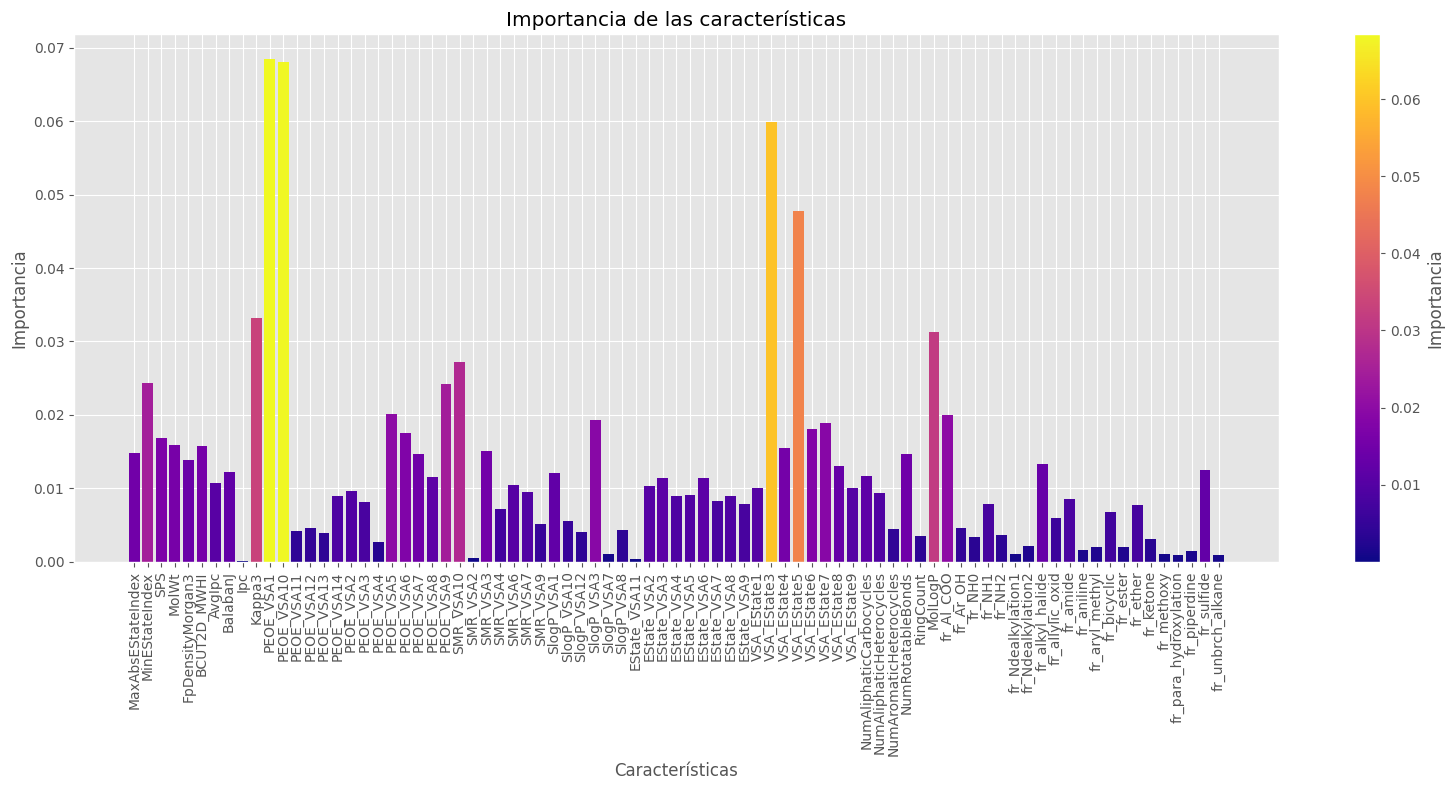

In [148]:
# Normalizar importancias para usar en el colormap
norm = plt.Normalize(min(importances), max(importances))
colors = plt.cm.plasma(norm(importances))

# Crear la figura y el gráfico de barras
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.bar(X.columns, importances, color=colors)

# Personalización opcional
ax.set_xlabel('Características')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de las características')
plt.xticks(rotation=90)

# Barra de color para mostrar el colormap
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Importancia')

# Mostrar gráfico
plt.tight_layout()
plt.show()